# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)





## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [51]:
from pprint import pprint


In [52]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =query_url+city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date =response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | nguiu
City not found. Skipping...
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | goias
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | yar-sale
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | fort nelson
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | yatou
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | severo-yeniseyskiy
Processing Record 22 of 

Processing Record 36 of Set 4 | yamada
Processing Record 37 of Set 4 | malazgirt
Processing Record 38 of Set 4 | riyadh
Processing Record 39 of Set 4 | zyryanka
Processing Record 40 of Set 4 | gurskoye
City not found. Skipping...
Processing Record 41 of Set 4 | bayangol
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | panlaitan
Processing Record 44 of Set 4 | dandong
Processing Record 45 of Set 4 | kanlagay
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | tanshui
City not found. Skipping...
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | sena madureira
Processing Record 0 of Set 5 | camopi
Processing Record 1 of Set 5 | saint-denis
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | powassan
Processing Record 4 of Set 5 | jacareacanga
Processing Record 5 of Set 5 | jalu
Processing Record 6 of Set 5 | conde
Processing Record 7 of Set 5 | namibe
Processin

Processing Record 26 of Set 8 | teacapan
Processing Record 27 of Set 8 | nazca
Processing Record 28 of Set 8 | mahina
Processing Record 29 of Set 8 | zlitan
Processing Record 30 of Set 8 | henties bay
Processing Record 31 of Set 8 | sakakah
Processing Record 32 of Set 8 | hargeysa
Processing Record 33 of Set 8 | warrnambool
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | nabire
Processing Record 36 of Set 8 | gueret
Processing Record 37 of Set 8 | bucerias
Processing Record 38 of Set 8 | ouagadougou
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | liuhe
Processing Record 41 of Set 8 | saint-joseph
Processing Record 42 of Set 8 | antofagasta
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | bud
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | sibanicu
Processing Record 47 of Set 8 | ariquemes
Processing Record 48 of Set 8 | naryan-mar
Processing Record 49 of

Processing Record 14 of Set 12 | nouadhibou
Processing Record 15 of Set 12 | agva
City not found. Skipping...
Processing Record 16 of Set 12 | shiyan
Processing Record 17 of Set 12 | calabozo
Processing Record 18 of Set 12 | north bend
Processing Record 19 of Set 12 | chimbote
Processing Record 20 of Set 12 | athabasca
Processing Record 21 of Set 12 | ust-uda
Processing Record 22 of Set 12 | meulaboh
Processing Record 23 of Set 12 | petawawa
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | leeton
Processing Record 26 of Set 12 | barstow
Processing Record 27 of Set 12 | mogadishu
Processing Record 28 of Set 12 | sansai
City not found. Skipping...
Processing Record 29 of Set 12 | makakilo city
Processing Record 30 of Set 12 | mitu
Processing Record 31 of Set 12 | hay river
Processing Record 32 of Set 12 | sortavala
Processing Record 33 of Set 12 | karamken
City not found. Skipping...
Processing Record 34 of Set 12 | matara
Processing Record 35 of Set 12 | d

In [54]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df ='78a7194f05df860ada090ecb3679e109'

city_data_df=pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila velha,-20.3297,-40.2925,78.94,85,20,8.01,BR,1676424530
1,kaitangata,-46.2817,169.8464,64.22,65,100,7.40,NZ,1676424557
2,hilo,19.7297,-155.0900,79.29,83,40,12.66,US,1676424402
3,goias,-15.5807,-49.6362,72.93,81,8,1.77,BR,1676424558
4,tual,-5.6667,132.7500,82.44,80,98,17.29,ID,1676424558


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila velha,-20.3297,-40.2925,78.94,85,20,8.01,BR,1676424530
1,kaitangata,-46.2817,169.8464,64.22,65,100,7.40,NZ,1676424557
2,hilo,19.7297,-155.0900,79.29,83,40,12.66,US,1676424402
3,goias,-15.5807,-49.6362,72.93,81,8,1.77,BR,1676424558
4,tual,-5.6667,132.7500,82.44,80,98,17.29,ID,1676424558


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

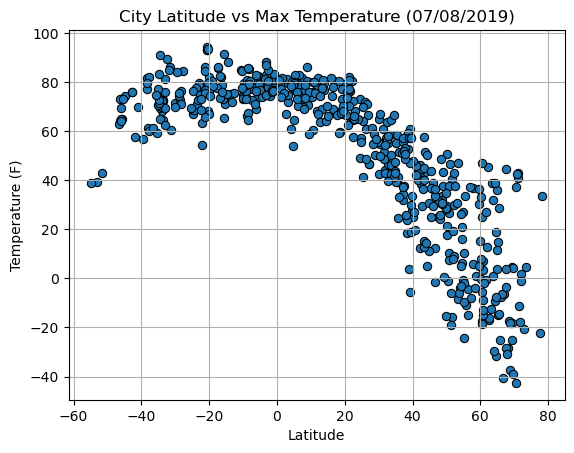

In [58]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

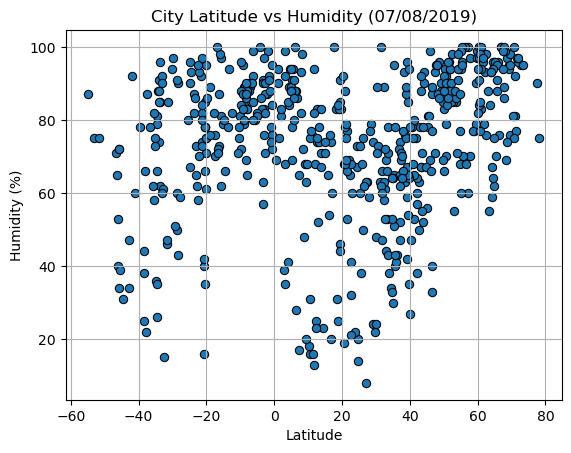

In [59]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatitudeHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

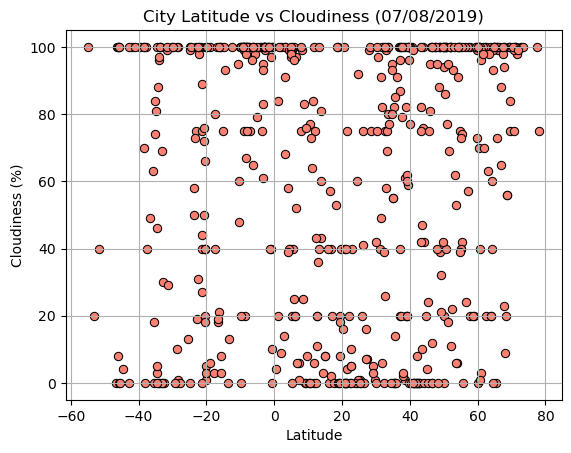

In [60]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatitudeCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

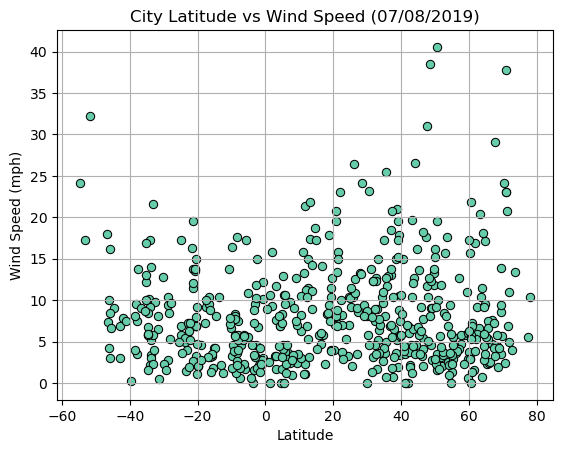

In [61]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatitudeWind.png")
plt.show()

## Linear Regression

In [63]:
# Create Northern and Southern Hemisphere DataFrames
north = city_data_df.loc[city_data_df['Lat'] >= 0]
south = city_data_df.loc[city_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.861


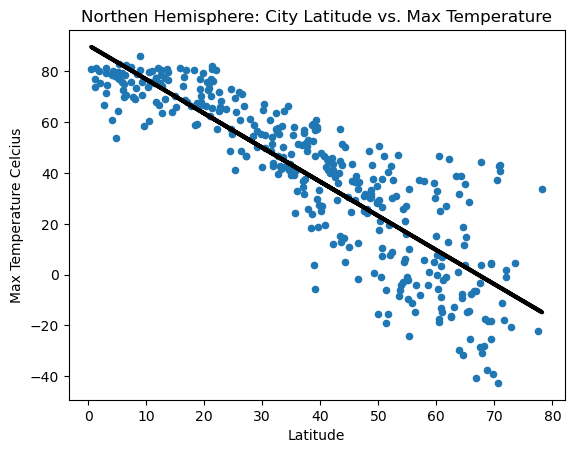

In [64]:
linear_regression = linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.473


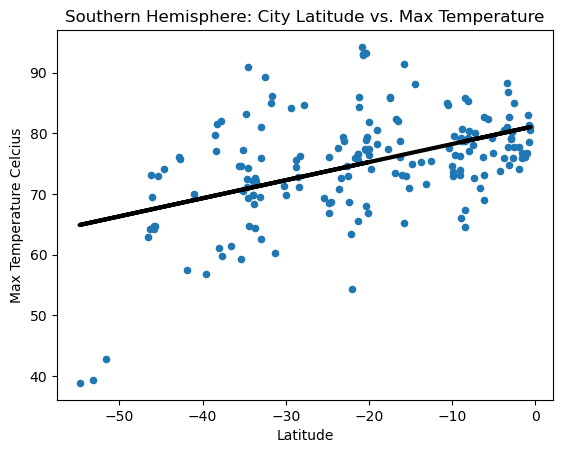

In [65]:
linear_regression = linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.159


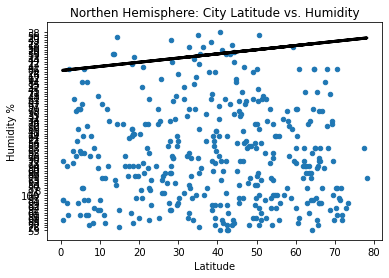

In [46]:
linear_regression = linregress(north["Lat"], north["Humidity"].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.445


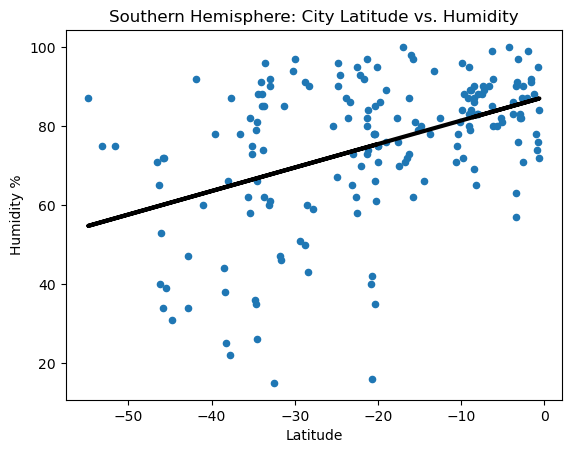

In [66]:
linear_regression = linregress(south['Lat'], south['Humidity'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.294


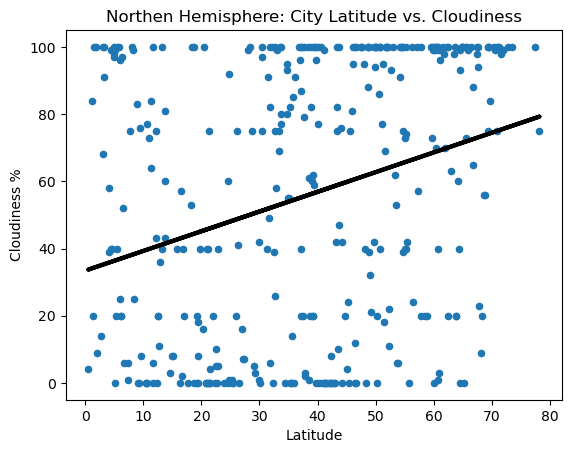

In [67]:
linear_regression = linregress(north['Lat'], north['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04


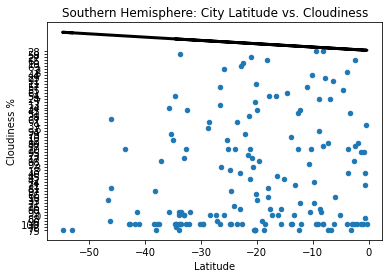

In [50]:
linear_regression = linregress(south['Lat'], south['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03


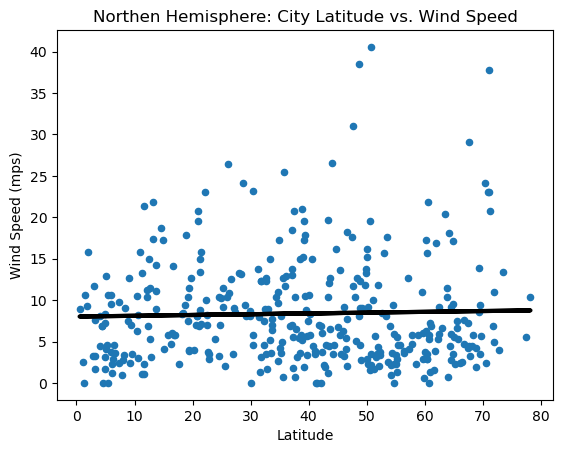

In [68]:
linear_regression = linregress(north['Lat'], north['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.125


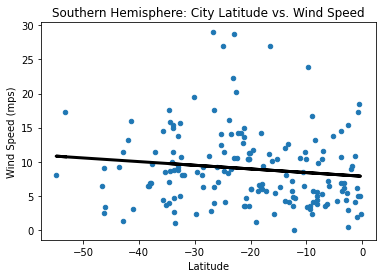

In [52]:
linear_regression = linregress(south['Lat'], south['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()